In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [22]:
df = pd.read_csv("stock_data.csv")

new_df = df.loc[df['Stock'] == 'Stock 73'] # selected a random stock out of the 100, and each stock has about 150 months of data so I grabbed all points under 'Stock 73'

new_df

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding,price
10800,2006-07-31,Stock 73,420.269126,345.390186,765.659312,375.983774,407.308900,818.881589,-399.441890,0.000000,1034575,100.000000
10801,2006-08-31,Stock 73,266.653024,400.390330,667.043354,278.654029,242.719190,793.726332,-0.681063,0.000000,1027437,97.824566
10802,2006-09-29,Stock 73,577.604385,152.717407,730.321792,569.662210,626.575076,545.910622,18.271385,4.261604,1055614,97.307314
10803,2006-10-31,Stock 73,550.397115,873.324250,1423.721365,957.522956,859.961788,487.499490,166.938163,38.002170,1000389,97.143217
10804,2006-11-30,Stock 73,994.109740,327.429255,1321.538995,832.678781,899.032571,260.933255,-66.768183,0.000000,1062548,98.033294
...,...,...,...,...,...,...,...,...,...,...,...,...
10945,2018-08-31,Stock 73,644.299768,825.215419,1469.515187,861.049559,712.397291,843.714127,-350.374868,0.000000,1000662,74.662704
10946,2018-09-28,Stock 73,809.032343,739.000692,1548.033035,490.246725,631.817623,806.248753,-140.824992,0.000000,1053276,73.925274
10947,2018-10-31,Stock 73,558.349130,989.666370,1548.015500,938.135429,942.595930,623.872577,201.765651,50.906702,1089868,73.128244
10948,2018-11-30,Stock 73,291.575972,786.821698,1078.397670,797.533679,680.325242,406.982577,185.259603,50.781364,1078911,73.559450


Used .describe() to check out the scale of each variable, obviously things like total revenue and equity are probably measured in at least the millions, but all the numbers are scaled down to read.

In [23]:
new_df.describe()

,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding,price
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000
mean,521.791981,559.778083,1081.570064,605.009046,628.071936,591.966342,-26.488606,17.093219,1.049528e+06,84.414884
std,254.887549,245.284743,361.261119,256.305199,259.965694,264.786887,206.312987,26.491846,3.077517e+04,10.863478
min,100.771574,118.904456,242.214439,110.445018,112.530388,102.319972,-471.705336,0.000000,1.000359e+06,68.509892
25%,301.018281,376.720620,816.733256,403.529864,411.313393,397.917690,-143.724441,0.000000,1.023261e+06,74.685498
50%,518.317550,552.484655,1088.317237,569.676286,617.339355,623.821834,-38.268238,0.000000,1.046402e+06,81.297248
75%,742.287551,763.703384,1309.901022,801.044063,792.238917,815.723380,126.804959,27.748706,1.076213e+06,95.821743
max,994.109740,996.991412,1884.637201,1400.573882,1222.017169,995.681214,406.488025,101.590734,1.099466e+06,102.886090


Checking for dtype and null data. Since all the columns have 150 non-null pieces of data, there are no gaps in the data and we can proceed to analyze it.

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 10800 to 10949
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 150 non-null    object 
 1   Stock                150 non-null    object 
 2   liabilities          150 non-null    float64
 3   equity               150 non-null    float64
 4   total_assets         150 non-null    float64
 5   current_assets       150 non-null    float64
 6   current_liabilities  150 non-null    float64
 7   total_revenue        150 non-null    float64
 8   net_income           150 non-null    float64
 9   dividend             150 non-null    float64
 10  shares_outstanding   150 non-null    int64  
 11  price                150 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 19.3+ KB


Dropped the dividend column because the numbers kept jumping around from 150 - 27 - 0.4 - 0 - 100... it was inconsistent and I couldn't make sense of why the numbers were doing that.

In [25]:
new_df = new_df.drop(columns=['dividend'])
new_df

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,shares_outstanding,price
10800,2006-07-31,Stock 73,420.269126,345.390186,765.659312,375.983774,407.308900,818.881589,-399.441890,1034575,100.000000
10801,2006-08-31,Stock 73,266.653024,400.390330,667.043354,278.654029,242.719190,793.726332,-0.681063,1027437,97.824566
10802,2006-09-29,Stock 73,577.604385,152.717407,730.321792,569.662210,626.575076,545.910622,18.271385,1055614,97.307314
10803,2006-10-31,Stock 73,550.397115,873.324250,1423.721365,957.522956,859.961788,487.499490,166.938163,1000389,97.143217
10804,2006-11-30,Stock 73,994.109740,327.429255,1321.538995,832.678781,899.032571,260.933255,-66.768183,1062548,98.033294
...,...,...,...,...,...,...,...,...,...,...,...
10945,2018-08-31,Stock 73,644.299768,825.215419,1469.515187,861.049559,712.397291,843.714127,-350.374868,1000662,74.662704
10946,2018-09-28,Stock 73,809.032343,739.000692,1548.033035,490.246725,631.817623,806.248753,-140.824992,1053276,73.925274
10947,2018-10-31,Stock 73,558.349130,989.666370,1548.015500,938.135429,942.595930,623.872577,201.765651,1089868,73.128244
10948,2018-11-30,Stock 73,291.575972,786.821698,1078.397670,797.533679,680.325242,406.982577,185.259603,1078911,73.559450


Plotting out all the columns as histograms to visually check for any outliers or irregularities. Noticed some columns like current_assets were skewed right, and total_assets and net_income were about normally distributed. This by itself doesn't mean much, but it was something to think about.

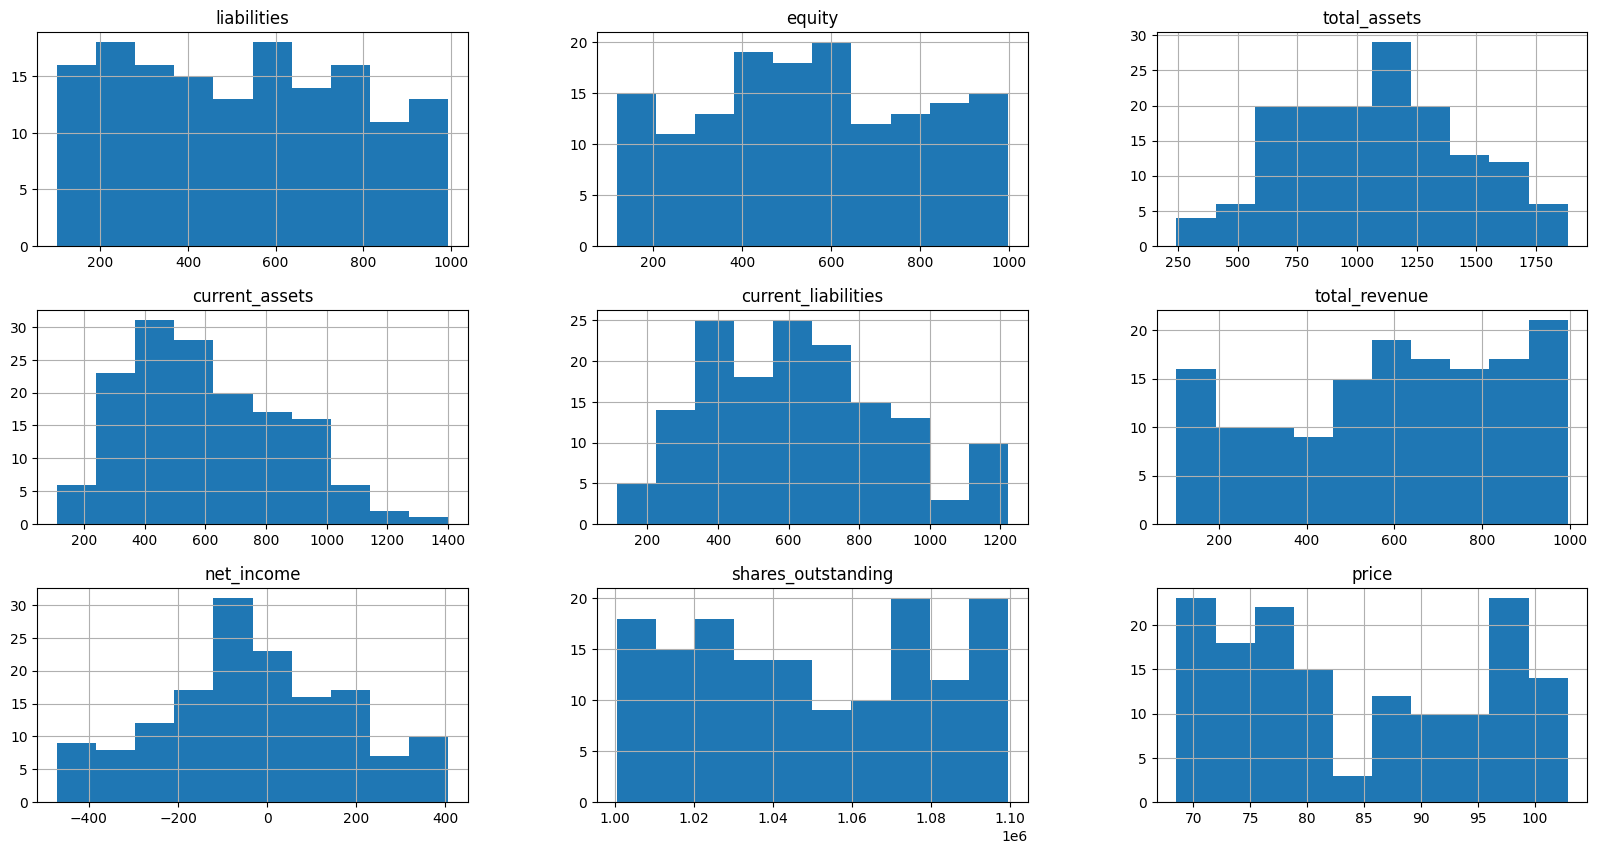

In [26]:
new_df.hist(figsize=(20,10))
plt.show()

Let's look at the regular plots of each column as well, but I don't think there will be much correlation.

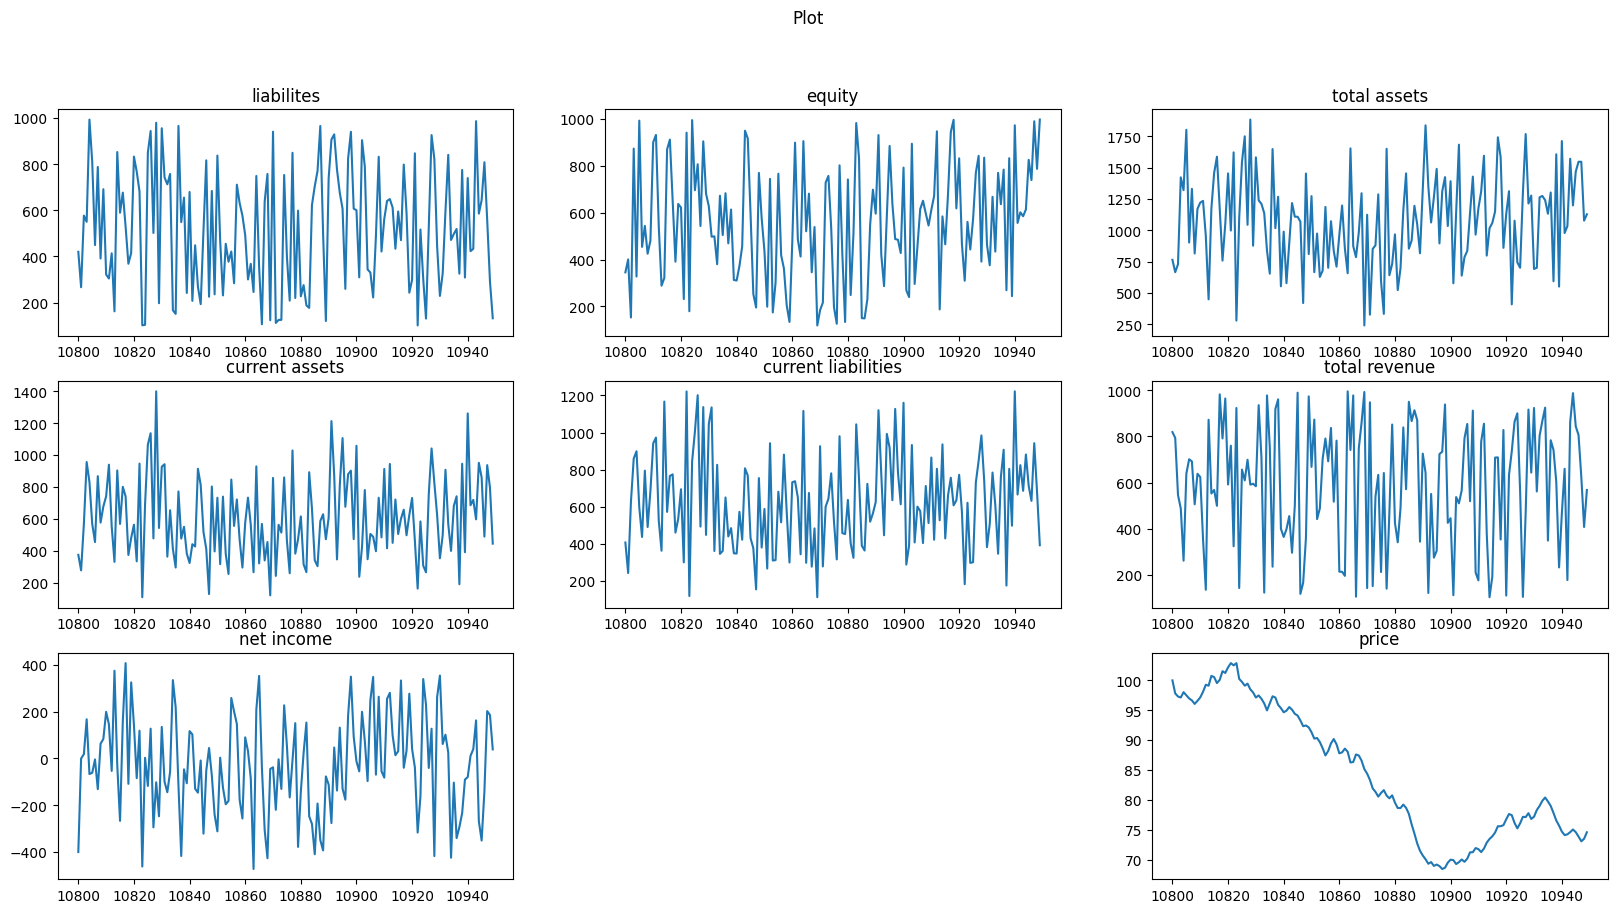

In [27]:
plt.figure(figsize=(20,10))
plt.suptitle('Plot')

plt.subplot(3,3,1)
plt.title('liabilites')
plt.plot(new_df['liabilities'])

plt.subplot(3,3,2)
plt.title('equity')
plt.plot(new_df['equity'])

plt.subplot(3,3,3)
plt.title('total assets')
plt.plot(new_df['total_assets'])

plt.subplot(3,3,4)
plt.title('current assets')
plt.plot(new_df['current_assets'])

plt.subplot(3,3,5)
plt.title('current liabilities')
plt.plot(new_df['current_liabilities'])

plt.subplot(3,3,6)
plt.title('total revenue')
plt.plot(new_df['total_revenue'])

plt.subplot(3,3,7)
plt.title('net income')
plt.plot(new_df['net_income'])

plt.subplot(3,3,9)
plt.title('price')
plt.plot(new_df['price'])

plt.show()

Wanted to check for outliers but through a different method. The box plots showed that current assets has an obvious outlier so we need to remove that.

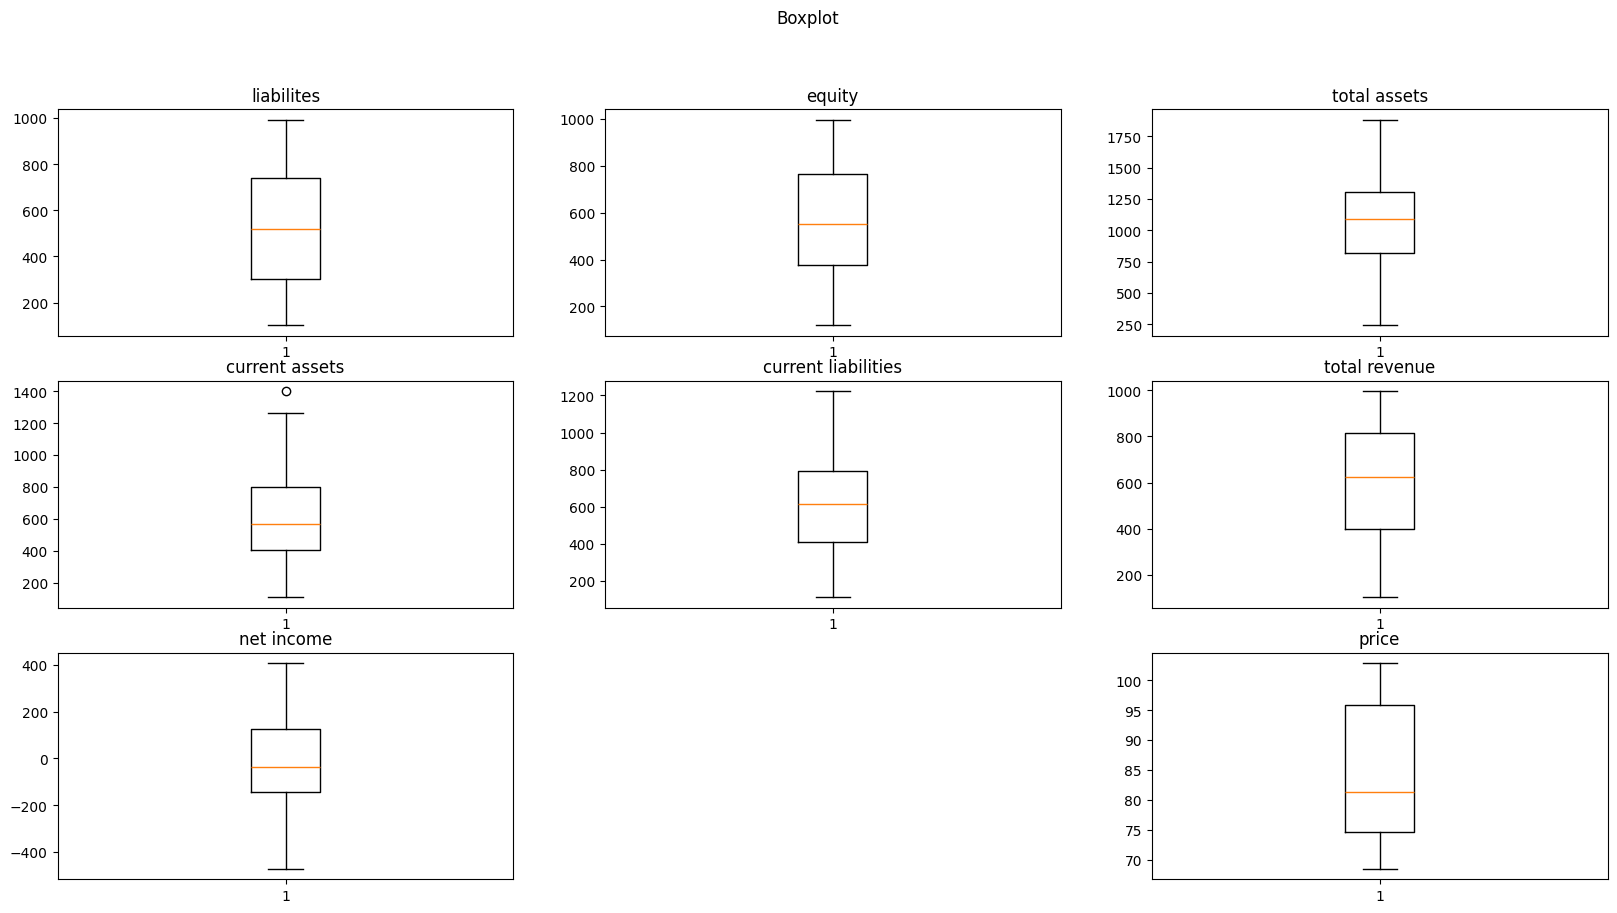

In [28]:
plt.figure(figsize=(20,10))
plt.suptitle('Boxplot')

plt.subplot(3,3,1)
plt.title('liabilites')
plt.boxplot(new_df['liabilities'])

plt.subplot(3,3,2)
plt.title('equity')
plt.boxplot(new_df['equity'])

plt.subplot(3,3,3)
plt.title('total assets')
plt.boxplot(new_df['total_assets'])

plt.subplot(3,3,4)
plt.title('current assets')
plt.boxplot(new_df['current_assets'])

plt.subplot(3,3,5)
plt.title('current liabilities')
plt.boxplot(new_df['current_liabilities'])

plt.subplot(3,3,6)
plt.title('total revenue')
plt.boxplot(new_df['total_revenue'])

plt.subplot(3,3,7)
plt.title('net income')
plt.boxplot(new_df['net_income'])

plt.subplot(3,3,9)
plt.title('price')
plt.boxplot(new_df['price'])

plt.show()

In [29]:
new_df["current_assets"] = winsorize(new_df["current_assets"], limits=[0.05, 0.05]) # shrinks the bottom and top 5% of the data to its nearest neighbor, effectively getting rid of the outliers

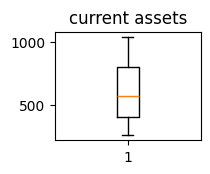

In [30]:
plt.subplot(3,3,4)
plt.title('current assets')
plt.boxplot(new_df['current_assets'])
plt.show() # no more outlier!

Ok now lets standardize the data with the scale() function from sk.learn. This should help ignore the scaling of each column and allow us to focus on just the patterns in the data.

In [31]:
from sklearn.preprocessing import scale

new_df["liabilities"] = scale(new_df["liabilities"])
new_df["equity"] = scale(new_df["equity"])
new_df["total_assets"] = scale(new_df["total_assets"])
new_df["current_assets"] = scale(new_df["current_assets"])
new_df["current_liabilities"] = scale(new_df["current_liabilities"])
new_df["total_revenue"] = scale(new_df["total_revenue"])
new_df["net_income"] = scale(new_df["net_income"])
new_df["shares_outstanding"] = scale(new_df["shares_outstanding"])
new_df["price"] = scale(new_df["price"])

new_df

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,shares_outstanding,price
10800,2006-07-31,Stock 73,-0.399639,-0.876965,-0.877396,-0.965936,-0.852046,0.859844,-1.813762,-0.487511,1.439440
10801,2006-08-31,Stock 73,-1.004340,-0.651984,-1.151288,-1.380792,-1.487287,0.764524,0.125508,-0.720229,1.238517
10802,2006-09-29,Stock 73,0.219702,-1.665103,-0.975541,-0.140407,-0.005777,-0.174518,0.217679,0.198414,1.190744
10803,2006-10-31,Stock 73,0.112602,1.282577,0.950275,1.512800,0.894990,-0.395854,0.940681,-1.602063,1.175588
10804,2006-11-30,Stock 73,1.859252,-0.950435,0.666479,0.980668,1.045786,-1.254375,-0.195889,0.424481,1.257795
...,...,...,...,...,...,...,...,...,...,...,...
10945,2018-08-31,Stock 73,0.482245,1.085785,1.077461,1.101595,0.325458,0.953941,-1.575137,-1.593163,-0.900711
10946,2018-09-28,Stock 73,1.130705,0.733119,1.295533,-0.478905,0.014457,0.811975,-0.556046,0.122189,-0.968820
10947,2018-10-31,Stock 73,0.143905,1.758481,1.295484,1.430163,1.213920,0.120901,1.110056,1.315183,-1.042433
10948,2018-11-30,Stock 73,-0.906232,0.928734,-0.008811,0.830866,0.201674,-0.700954,1.029783,0.957957,-1.002607


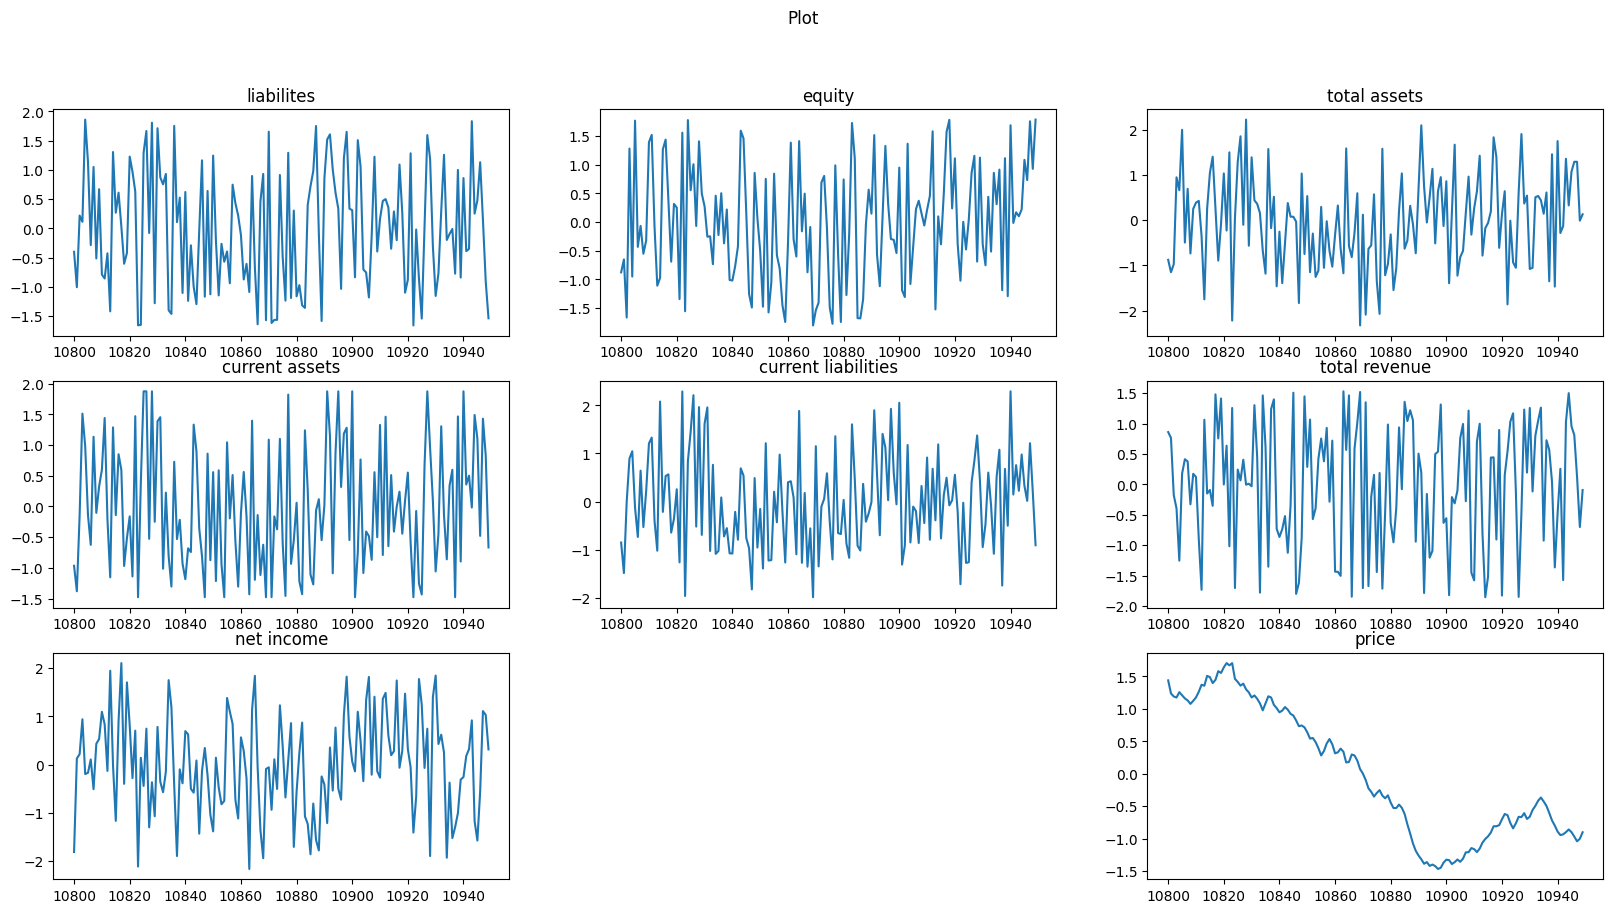

In [32]:
plt.figure(figsize=(20,10))
plt.suptitle('Plot')

plt.subplot(3,3,1)
plt.title('liabilites')
plt.plot(new_df['liabilities'])

plt.subplot(3,3,2)
plt.title('equity')
plt.plot(new_df['equity'])

plt.subplot(3,3,3)
plt.title('total assets')
plt.plot(new_df['total_assets'])

plt.subplot(3,3,4)
plt.title('current assets')
plt.plot(new_df['current_assets'])

plt.subplot(3,3,5)
plt.title('current liabilities')
plt.plot(new_df['current_liabilities'])

plt.subplot(3,3,6)
plt.title('total revenue')
plt.plot(new_df['total_revenue'])

plt.subplot(3,3,7)
plt.title('net income')
plt.plot(new_df['net_income'])

plt.subplot(3,3,9)
plt.title('price')
plt.plot(new_df['price'])

plt.show()

In [33]:
new_df.to_csv("clean_df.csv")